# Feature Selection in Python
#### This is a practice of what's on https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
#### & https://machinelearningmastery.com/rfe-feature-selection-in-python/
#### Data is from http://archive.ics.uci.edu/ml/datasets/Heart+Disease
#### & http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
#### (processed.cleveland.data)

In [30]:
# Read data
import pandas as pd
import numpy as np

Data = pd.read_csv('processed.cleveland.data', header=None, usecols=range(0,14),
                     names=['age',   'sex',     'cp',      'trestbps', 'chol',
                            'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                            'slope', 'ca',      'thal',    'hd'])

# If 'hd' is not zero, consider the patient has heart disease.
Data.loc[Data['hd']!=0,'hd']= 1

# 'ca' and 'thal' have '?'. Convert this to np.nan to impute later
Data.loc[Data.ca=='?','ca']=np.nan
Data.loc[Data.thal=='?','thal']=np.nan

# Cursory check
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [31]:
# Impute data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select complete data.
Data_Complete = Data[(Data['ca'].notna()) & (Data['thal'].notna())]
# Have the imputer ready.
imp = IterativeImputer(max_iter=10, random_state=2580)
imp.fit(Data_Complete)
# Impute the missing data.
Data_Missing = imp.transform(Data[(Data['ca'].isna()) | (Data['thal'].isna())])
Data_Missing = pd.DataFrame(data = Data_Missing,
                            columns =['age',   'sex',     'cp',      'trestbps', 'chol',
                                      'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                                      'slope', 'ca',      'thal',    'hd'])
# Combine Complete and Missing
Data_Imputed = pd.concat([Data_Complete, Data_Missing]).reset_index(drop=True)
Data_Imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


In [32]:
# Check the number of unique values of each feature. Small numbers like 2 or 3 mean they are factors.
columnId = 0
for i in Data_Imputed.columns.tolist():
    print(columnId, i, Data_Imputed[i].nunique())
    columnId = columnId+1

0 age 41
1 sex 2
2 cp 4
3 trestbps 50
4 chol 152
5 fbs 2
6 restecg 3
7 thalach 91
8 exang 2
9 oldpeak 40
10 slope 3
11 ca 9
12 thal 7
13 hd 2


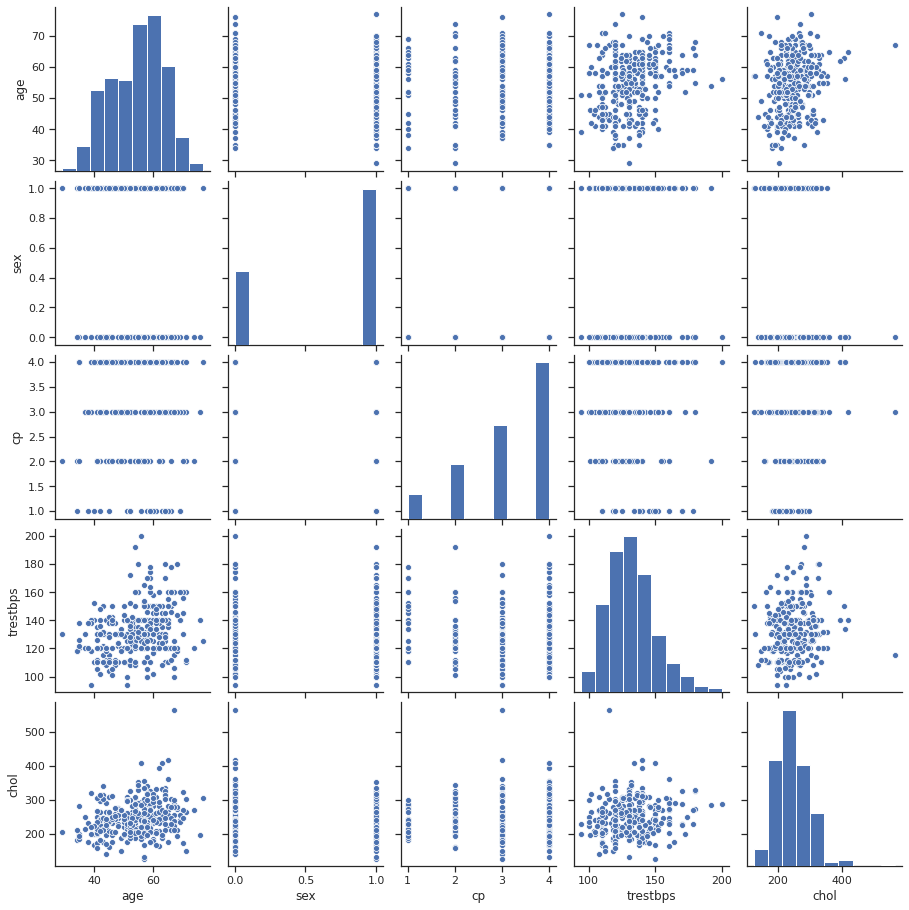

In [33]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
Data_small = Data.iloc[:,:5]
g = sns.pairplot(Data_small)

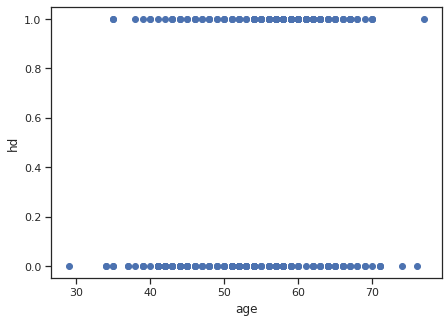

In [34]:
# Plot 'heart disease'(y) vs 'age'(x)
import matplotlib.pyplot as plt

x=Data['age']
y=Data['hd']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('hd')
plt.show()

## 1. Feature Selection Methods

<b>Feature selection</b> methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

Some predictive modeling problems have a large number of variables that can slow the development and training of models and require a large amount of system memory. Additionally, the performance of some models can degrade when including input variables that are not relevant to the target variable.

One way to think about feature selection methods are in terms of <b>supervised</b> and <b>unsupervised</b> methods.

The difference has to do with whether features are selected based on the target variable or not. Unsupervised feature selection techniques ignores the target variable, such as methods that remove redundant variables using correlation. Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables..

Another way to consider the mechanism used to select features which may be divided into <b>wrapper</b> and <b>filter</b> methods. These methods are almost always supervised and are evaluated based on the performance of a resulting model on a hold out dataset.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.

Finally, there are some machine learning algorithms that perform feature selection automatically as part of learning the model. We might refer to these techniques as <b>intrinsic</b> feature selection methods. This includes algorithms such as penalized regression models like Lasso and decision trees, including ensembles of decision trees like random forest.

Feature selection is also related to dimensionally reduction techniques in that both methods seek fewer input variables to a predictive model. The difference is that feature selection select features to keep or remove from the dataset, whereas dimensionality reduction create a projection of the data resulting in entirely new input features. As such, dimensionality reduction is an alternate to feature selection rather than a type of feature selection.

We can summarize feature selection as follows.

- <b>Feature Selection</b>: Select a subset of input features from the dataset.
    - <b>Unsupervised</b>: Do not use the target variable (e.g. remove redundant variables).
        - Correlation

- <b>Supervised</b>: Use the target variable (e.g. remove irrelevant variables).
    - <b>Wrapper</b>: Search for well-performing subsets of features.
        - RFE
    - <b>Filter</b>: Select subsets of features based on their relationship with the target.
        - Statistical Methods
        - Feature Importance Methods
    - <b>Intrinsic</b>: Algorithms that perform automatic feature selection during training.
        - Decision Trees
        - Lasso regression
- <b>Dimensionality Reduction</b>: Project input data into a lower-dimensional feature space.

The image below provides a summary of this hierarchy of feature selection techniques.

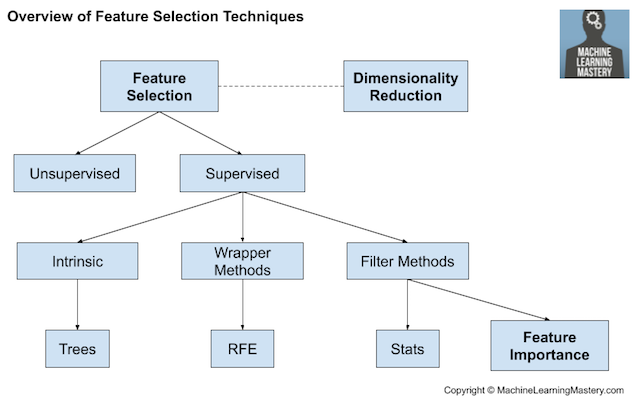

In [35]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "Overview-of-Feature-Selection-Techniques3.png", width = 640, height = 398)

## 2. Statistics for Filter-Based Feature Selection Methods

It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection.

As such, the choice of statistical measures is highly dependent upon the variable data types.

Common data types include numerical (such as height) and categorical (such as a label), although each may be further subdivided such as integer and floating point for numerical variables, and boolean, ordinal, or nominal for categorical variables.

Common input variable data types:

- <b>Numerical Variables</b>
    - Integer Variables
    - Floating Point Variables
- <b>Categorical Variables</b>
    - Boolean Variables (dichotomous)
    - Ordinal Variables
    - Nominal Variables

The more that is known about the data type of a variable, the easier it is to choose an appropriate statistical measure for a filter-based feature selection method.

In this section, we will consider two broad categories of variable types: numerical and categorical; also, the two main groups of variables to consider: input and output.

Input variables are those that are provided as input to a model. In feature selection, it is this group of variables that we wish to reduce in size. Output variables are those for which a model is intended to predict, often called the response variable.

The type of response variable typically indicates the type of predictive modeling problem being performed. For example, a numerical output variable indicates a regression predictive modeling problem, and a categorical output variable indicates a classification predictive modeling problem.

- <b>Numerical Output</b>: Regression predictive modeling problem.
- <b>Categorical Output</b>: Classification predictive modeling problem.

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.

With this framework, let’s review some univariate statistical measures that can be used for filter-based feature selection.

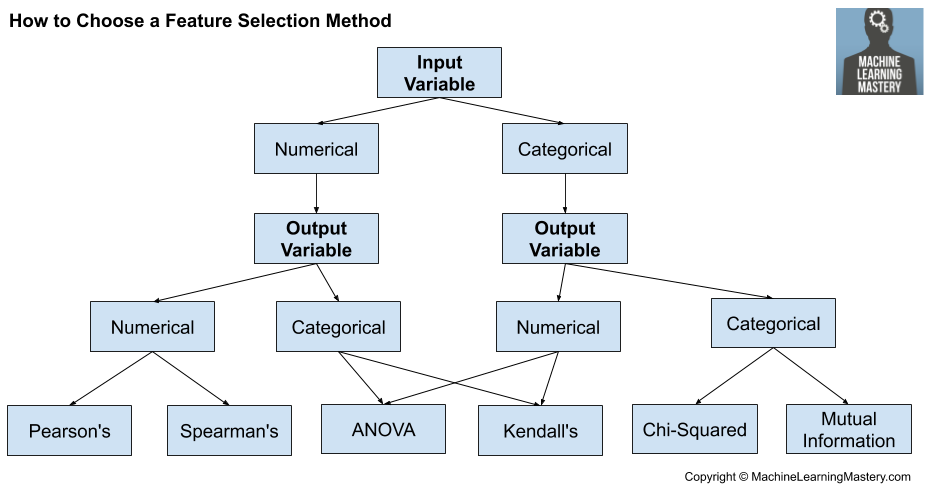

In [36]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png", width = 931, height = 486)

### Numerical Input, Numerical Output

This is a regression predictive modeling problem with numerical input variables.

The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

- Pearson’s correlation coefficient (linear).
- Spearman’s rank coefficient (nonlinear)


### Numerical Input, Categorical Output

This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

- ANOVA correlation coefficient (linear).
- Kendall’s rank coefficient (nonlinear).

Kendall does assume that the categorical variable is ordinal.

### Categorical Input, Numerical Output

This is a regression predictive modeling problem with categorical input variables.

This is a strange example of a regression problem (e.g. you would not encounter it often).

Nevertheless, you can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.

### Categorical Input, Categorical Output

This is a classification predictive modeling problem with categorical input variables.

The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

- Chi-Squared test (contingency tables).
- Mutual Information.

In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.

## 3. Tips and Tricks for Feature Selection

This section provides some additional considerations when using filter-based feature selection.

### Correlation Statistics

The scikit-learn library provides an implementation of most of the useful statistical measures.

For example:

- Pearson’s Correlation Coefficient: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
- ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
- Chi-Squared: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
- Mutual Information: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) and [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau ([kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)) and Spearman’s rank correlation ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)).

### Selection Method

The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

Two of the more popular methods include:

- Select the top k variables: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
- Select the top percentile variables: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)

I often use SelectKBest myself.

### Transform Variables

Consider transforming the variables in order to access different statistical methods.

For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.

You can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

### What Is the Best Method?

There is no best feature selection method.

Just like there is no best set of input variables or best machine learning algorithm. At least not universally.

Instead, you must discover what works best for your specific problem using careful systematic experimentation.

Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

In [37]:
# Check the number of unique values of each feature. Small numbers like 2 or 3 mean they are factors.
columnId = 0
for i in Data_Imputed.columns.tolist():
    print(columnId, i, Data_Imputed[i].nunique())
    columnId = columnId+1

0 age 41
1 sex 2
2 cp 4
3 trestbps 50
4 chol 152
5 fbs 2
6 restecg 3
7 thalach 91
8 exang 2
9 oldpeak 40
10 slope 3
11 ca 9
12 thal 7
13 hd 2


## 4. Worked Examples of Feature Selection

It can be helpful to have some worked examples that you can copy-and-paste and adapt for your own project.

This section provides worked examples of feature selection cases that you can use as a starting point.

### Regression Feature Selection: (Numerical Input, Numerical Output)

This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.

Feature selection is performed using [Pearson’s Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) via the [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) function.

In [38]:
# Pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
X = Data_Imputed[['age','trestbps','chol','thalach']]
y = Data_Imputed['oldpeak']

# define feature selection
# score_func: Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
#             or a single array with scores. Default is f_classif.
#             The default function only works with classification tasks.
#
# f_regression: Univariate linear regression tests.
#             Linear model for testing the individual effect of each of many regressors. 
#             This is a scoring function to be used in a feature selection procedure, 
#             not a free standing feature selection procedure.
#
# k: Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
#             k=2 means reduce X to 2 most important features.
fs = SelectKBest(score_func=f_regression, k=2)

# apply feature selection
# fit_transform fits the data and reduce X to k features.
X_selected = fs.fit_transform(X, y)

In [39]:
# Once fitted, you can see which feature is selected
fs.get_support()

array([ True, False, False,  True])

In [40]:
# Print out thre reduced X
X_selected

array([[ 63., 150.],
       [ 67., 108.],
       [ 67., 129.],
       [ 37., 187.],
       [ 41., 172.],
       [ 56., 178.],
       [ 62., 160.],
       [ 57., 163.],
       [ 63., 147.],
       [ 53., 155.],
       [ 57., 148.],
       [ 56., 153.],
       [ 56., 142.],
       [ 44., 173.],
       [ 52., 162.],
       [ 57., 174.],
       [ 48., 168.],
       [ 54., 160.],
       [ 48., 139.],
       [ 49., 171.],
       [ 64., 144.],
       [ 58., 162.],
       [ 58., 160.],
       [ 58., 173.],
       [ 60., 132.],
       [ 50., 158.],
       [ 58., 172.],
       [ 66., 114.],
       [ 43., 171.],
       [ 40., 114.],
       [ 69., 151.],
       [ 60., 160.],
       [ 64., 158.],
       [ 59., 161.],
       [ 44., 179.],
       [ 42., 178.],
       [ 43., 120.],
       [ 57., 112.],
       [ 55., 132.],
       [ 61., 137.],
       [ 65., 114.],
       [ 40., 178.],
       [ 71., 162.],
       [ 59., 157.],
       [ 61., 169.],
       [ 58., 165.],
       [ 51., 123.],
       [ 50.,

### Classification Feature Selection: (Numerical Input, Categorical Output)

This section demonstrates feature selection for a classification problem that as numerical inputs and categorical outputs.

Feature selection is performed using [ANOVA F measure](https://en.wikipedia.org/wiki/F-test) via the [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) function.

In [41]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# generate dataset
X = Data_Imputed[['age','trestbps','chol','thalach','oldpeak']]
y = Data_Imputed['hd']

# define feature selection
# score_func: Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
#             or a single array with scores. Default is f_classif.
#             The default function only works with classification tasks.
#
# f_classif: Compute the ANOVA F-value for the provided sample.
#
# k: Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
#             k=2 means reduce X to 2 most important features.
fs = SelectKBest(score_func=f_classif, k=2)

# apply feature selection
# fit_transform fits the data and reduce X to k features.
X_selected = fs.fit_transform(X, y)

In [42]:
# Once fitted, you can see which feature is selected
fs.get_support()

array([False, False, False,  True,  True])

In [43]:
# Print out thre reduced X
X_selected

array([[1.50e+02, 2.30e+00],
       [1.08e+02, 1.50e+00],
       [1.29e+02, 2.60e+00],
       [1.87e+02, 3.50e+00],
       [1.72e+02, 1.40e+00],
       [1.78e+02, 8.00e-01],
       [1.60e+02, 3.60e+00],
       [1.63e+02, 6.00e-01],
       [1.47e+02, 1.40e+00],
       [1.55e+02, 3.10e+00],
       [1.48e+02, 4.00e-01],
       [1.53e+02, 1.30e+00],
       [1.42e+02, 6.00e-01],
       [1.73e+02, 0.00e+00],
       [1.62e+02, 5.00e-01],
       [1.74e+02, 1.60e+00],
       [1.68e+02, 1.00e+00],
       [1.60e+02, 1.20e+00],
       [1.39e+02, 2.00e-01],
       [1.71e+02, 6.00e-01],
       [1.44e+02, 1.80e+00],
       [1.62e+02, 1.00e+00],
       [1.60e+02, 1.80e+00],
       [1.73e+02, 3.20e+00],
       [1.32e+02, 2.40e+00],
       [1.58e+02, 1.60e+00],
       [1.72e+02, 0.00e+00],
       [1.14e+02, 2.60e+00],
       [1.71e+02, 1.50e+00],
       [1.14e+02, 2.00e+00],
       [1.51e+02, 1.80e+00],
       [1.60e+02, 1.40e+00],
       [1.58e+02, 0.00e+00],
       [1.61e+02, 5.00e-01],
       [1.79e+

### Categorical Feature Selection ([link](https://machinelearningmastery.com/feature-selection-with-categorical-data/))

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

- Chi-Squared Statistic.
- Mutual Information Statistic.

Let’s take a closer look at each in turn.

### Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

You can learn more about this statistical test in the tutorial:

- [A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

The scikit-learn machine library provides an implementation of the chi-squared test in the [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the [SelectKBest class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

In [44]:
# Chi squared feature selection for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# generate dataset
X = Data_Imputed[['sex','cp','fbs','restecg','exang','slope']]
y = Data_Imputed['hd']

# define feature selection
# score_func: Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
#             or a single array with scores. Default is f_classif.
#             The default function only works with classification tasks.
#
# chi2: Compute chi-squared stats between each non-negative feature and class.
#
# k: Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
#             k=2 means reduce X to 2 most important features.
fs = SelectKBest(score_func=chi2, k=2)

# apply feature selection
# fit_transform fits the data and reduce X to k features.
X_selected = fs.fit_transform(X, y)

In [45]:
# Once fitted, you can see which feature is selected
fs.get_support()

array([False,  True, False, False,  True, False])

In [46]:
# Print out thre reduced X
X_selected

array([[1., 0.],
       [4., 1.],
       [4., 1.],
       [3., 0.],
       [2., 0.],
       [2., 0.],
       [4., 0.],
       [4., 1.],
       [4., 0.],
       [4., 1.],
       [4., 0.],
       [2., 0.],
       [3., 1.],
       [2., 0.],
       [3., 0.],
       [3., 0.],
       [2., 0.],
       [4., 0.],
       [3., 0.],
       [2., 0.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [3., 0.],
       [4., 1.],
       [3., 0.],
       [3., 0.],
       [1., 0.],
       [4., 0.],
       [4., 1.],
       [1., 0.],
       [4., 1.],
       [3., 0.],
       [4., 0.],
       [3., 1.],
       [4., 0.],
       [4., 1.],
       [4., 1.],
       [4., 1.],
       [3., 1.],
       [4., 0.],
       [1., 1.],
       [2., 0.],
       [3., 0.],
       [4., 0.],
       [3., 0.],
       [3., 0.],
       [4., 0.],
       [3., 0.],
       [3., 0.],
       [2., 0.],
       [4., 0.],
       [4., 0.],
       [2., 0.],
       [4., 1.],
       [4., 1.],
       [3., 0.],
       [4., 0.],
       [3., 0.

In [47]:
# Alternatively set k='all' and examine feature scores
fs = SelectKBest(score_func=chi2, k='all')
X_selected = fs.fit_transform(X, y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 7.432845
Feature 1: 15.140160
Feature 2: 0.164669
Feature 3: 8.644897
Feature 4: 38.052613
Feature 5: 8.243914


### Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

You can learn more about mutual information in the following tutorial.

- [What Is Information Gain and Mutual Information for Machine Learning](https://machinelearningmastery.com/information-gain-and-mutual-information)

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).


<b>Note</b>: Your [results may vary](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/) given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [48]:
# Mutual information feature selection for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# generate dataset
X = Data_Imputed[['sex','cp','fbs','restecg','exang','slope']]
y = Data_Imputed['hd']

# define feature selection
# score_func: Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
#             or a single array with scores. Default is f_classif.
#             The default function only works with classification tasks.
#
# chi2: Compute chi-squared stats between each non-negative feature and class.
#
# k: Number of top features to select. The “all” option bypasses selection, for use in a parameter search.
#             k=2 means reduce X to 2 most important features.
fs = SelectKBest(score_func=mutual_info_classif, k=2)

# apply feature selection
# fit_transform fits the data and reduce X to k features.
X_selected = fs.fit_transform(X, y)

In [49]:
# Once fitted, you can see which feature is selected
fs.get_support()

array([False,  True, False, False,  True, False])

In [50]:
# Print out thre reduced X
X_selected

array([[1., 0.],
       [4., 1.],
       [4., 1.],
       [3., 0.],
       [2., 0.],
       [2., 0.],
       [4., 0.],
       [4., 1.],
       [4., 0.],
       [4., 1.],
       [4., 0.],
       [2., 0.],
       [3., 1.],
       [2., 0.],
       [3., 0.],
       [3., 0.],
       [2., 0.],
       [4., 0.],
       [3., 0.],
       [2., 0.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [3., 0.],
       [4., 1.],
       [3., 0.],
       [3., 0.],
       [1., 0.],
       [4., 0.],
       [4., 1.],
       [1., 0.],
       [4., 1.],
       [3., 0.],
       [4., 0.],
       [3., 1.],
       [4., 0.],
       [4., 1.],
       [4., 1.],
       [4., 1.],
       [3., 1.],
       [4., 0.],
       [1., 1.],
       [2., 0.],
       [3., 0.],
       [4., 0.],
       [3., 0.],
       [3., 0.],
       [4., 0.],
       [3., 0.],
       [3., 0.],
       [2., 0.],
       [4., 0.],
       [4., 0.],
       [2., 0.],
       [4., 1.],
       [4., 1.],
       [3., 0.],
       [4., 0.],
       [3., 0.

In [51]:
# Alternatively set k='all' and examine feature scores
fs = SelectKBest(score_func=mutual_info_classif, k='all')
X_selected = fs.fit_transform(X, y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.058813
Feature 1: 0.129286
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.100666
Feature 5: 0.085710


## 5. Recursive Feature Elimination (RFE) for Feature Selection in Python

<b>Recursive Feature Elimination</b>, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.

In this tutorial, you will discover how to use Recursive Feature Elimination (RFE) for feature selection in Python.

After completing this tutorial, you will know:

- RFE is an efficient approach for eliminating features from a training dataset for feature selection.
- How to use RFE for feature selection for classification and regression predictive modeling problems.
- How to explore the number of selected features and wrapped algorithm used by the RFE procedure.


### Recursive Feature Elimination

A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet. Rows are often referred to as samples and columns are referred to as features, e.g. features of an observation in a problem domain.

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

For more on feature selection generally, see the tutorial:

- [Feature Selection for Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score. Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally. 

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains. Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.

Now that we are familiar with the RFE procedure, let’s review how we can use it in our projects.

### RFE for Classification
In this section, we will look at using RFE for a classification problem.

we can evaluate an RFE feature selection algorithm on this dataset. We will use a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to choose features and set the number of features to five. We will then fit a new DecisionTreeClassifier model on the selected features.

We will evaluate the model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will report the mean and standard deviation of the accuracy of the model across all repeats and folds.

The complete example is listed below.

In [52]:
# Evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Define dataset
X = Data_Imputed.iloc[:,:13]
y = Data_Imputed.iloc[:,13]

# Create pipeline
#
# Feature ranking with recursive feature elimination.
# estimator : A supervised learning estimator with a fit method that provides information about feature importance 
#             either through a coef_ attribute or through a feature_importances_ attribute.
# n_features_to_select : The number of features to select. If None, half of the features are selected.
rfe      = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
#
model    = DecisionTreeClassifier()
#
# Pipeline of transforms with a final estimator.
# steps : List of (name, transform) tuples (implementing fit/transform) that are chained, 
#             in the order in which they are chained, with the last object an estimator.
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# Evaluate model
#
# n_splits : Number of folds. Must be at least 2.
# n_repeats : Number of times cross-validator needs to be repeated.
cv       = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#
# n_jobs : The number of CPUs to use to do the computation. None means 1 unless in a joblib.parallel_backend context. 
#             -1 means using all processors.
# error_score: Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. 
#             If a numeric value is given, FitFailedWarning is raised. This parameter does not affect the refit step, 
#             which will always raise the error.
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Fit the model on all available data
pipeline.fit(X, y)
# Make a prediction using some X data (I know I'm using the training data for testing here. Don't do what I do.)
data = X.iloc[0:5,:].values
yhat = pipeline.predict(data)
print('Predicted Class:', (yhat))

Accuracy: 0.719 (0.061)
Predicted Class: [0. 1. 1. 0. 0.]


### RFE for Regression

In this section, we will look at using RFE for a regression problem.

As we did with the last section, we will evaluate the pipeline with a decision tree using repeated k-fold cross-validation, with three repeats and 10 folds.

We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

The complete example is listed below.

Running the example reports the mean and standard deviation accuracy of the model.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the RFE pipeline with a decision tree model achieves a MAE of -8.2.

In [53]:
# Evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Define dataset
# Predict age using everything else.
X = Data_Imputed.iloc[:,1:]
y = Data_Imputed.iloc[:,0]

# Create pipeline
#
# Feature ranking with recursive feature elimination.
# estimator : A supervised learning estimator with a fit method that provides information about feature importance 
#             either through a coef_ attribute or through a feature_importances_ attribute.
# n_features_to_select : The number of features to select. If None, half of the features are selected.
rfe      = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
#
model    = DecisionTreeRegressor()
#
# Pipeline of transforms with a final estimator.
# steps : List of (name, transform) tuples (implementing fit/transform) that are chained, 
#             in the order in which they are chained, with the last object an estimator.
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# Evaluate model
#
# n_splits : Number of folds. Must be at least 2.
# n_repeats : Number of times cross-validator needs to be repeated.
cv       = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
#
# n_jobs : The number of CPUs to use to do the computation. None means 1 unless in a joblib.parallel_backend context. 
#             -1 means using all processors.
# error_score: Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. 
#             If a numeric value is given, FitFailedWarning is raised. This parameter does not affect the refit step, 
#             which will always raise the error.
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# Report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Fit the model on all available data
pipeline.fit(X, y)
# Make a prediction using some X data (I know I'm using the training data for testing here. Don't do what I do.)
data = X.iloc[0:5,:].values
yhat = pipeline.predict(data)
print('Predicted Class:', (yhat))

# Accuracy is pretty bad, but you know how this works.

MAE: -8.228 (1.059)
Predicted Class: [63. 67. 67. 37. 41.]


## RFE Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the RFE method for feature selection and their effect on model performance.

### Explore Number of Features
An important hyperparameter for the RFE algorithm is the number of features to select.

In the previous section, we used an arbitrary number of selected features, five, which matches the number of informative features in the synthetic dataset. In practice, we cannot know the best number of features to select with RFE; instead, it is good practice to test different values.

The example below demonstrates selecting different numbers of features from 2 to 10 on the synthetic binary classification dataset.

Running the example first reports the mean accuracy for each configured number of input features.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that performance improves as the number of features increase and perhaps peaks around 4-to-7 as we might expect, given that only five features are relevant to the target variable.


>2 0.636 (0.078)
>3 0.642 (0.083)
>4 0.701 (0.083)
>5 0.718 (0.061)
>6 0.746 (0.060)
>7 0.726 (0.064)
>8 0.735 (0.058)
>9 0.720 (0.064)


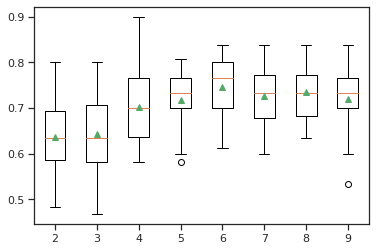

In [54]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X = Data_Imputed.iloc[:,:13]
    y = Data_Imputed.iloc[:,13]
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):        # Select the number of features from 2-9.
        rfe   = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # because there are 30 tests (n_splits=10, n_repeats=3), this returns 30 different accuracy scores.
    cv     = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Automatically Select the Number of Features

It is also possible to automatically select the number of features chosen by RFE.

This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score.

The [RFECV class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) implements this for us.

The <i>RFECV</i> is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “<i>min_features_to_select</i>” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “<i>cv</i>” (defaults to 5) and “<i>scoring</i>” arguments (uses accuracy for classification).

We can demonstrate this on our synthetic binary classification problem and use RFECV in our pipeline instead of RFE to automatically choose the number of selected features.

The complete example is listed below.

In [55]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X = Data_Imputed.iloc[:,:13]
y = Data_Imputed.iloc[:,13]

# create pipeline
rfe      = RFECV(estimator=DecisionTreeClassifier())
model    = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Here RFE was just done with 5 fold CV (default), and then tested with 10-fold CV with 3 repeats.

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('The Number of Features: ', np.count_nonzero(rfe.fit(X,y).support_))

# show which features are selected
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.728 (0.068)
The Number of Features:  9
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 4.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000


Running the example reports the mean and standard deviation accuracy of the model.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the RFE that uses a decision tree and automatically selects a number of features and then fits a decision tree on the selected features achieves a classification accuracy of about 71-73%.

### Which Features Were Selected

When using RFE, we may be interested to know which features were selected and which were removed.

This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “<i>support_</i>” attribute reports true or false as to which features in order of column index were included and the “<i>ranking_</i>” attribute reports the relative ranking of features in the same order.

The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (<i>True</i> or <i>False</i>), and the relative feature ranking.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Running the example lists of the 13 input features and whether or not they were selected as well as their relative ranking of importance.

In [56]:
# report which features were selected by RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X = Data_Imputed.iloc[:,:13]
y = Data_Imputed.iloc[:,13]

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 4.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 9.000
Column: 6, Selected False, Rank: 7.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000


### Explore Base Algorithm

There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.

The example below demonstrates how you might explore this configuration option.

Running the example first reports the mean accuracy for each wrapped algorithm.

<b>Note</b>: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

A box and whisker plot is created for the distribution of accuracy scores for each configured wrapped algorithm.

We can see the general trend of good performance with logistic regression, Perceptron, and perhaps GBM. This highlights that even thought the actual model used to fit the chosen features is the same in each case, the model used within RFE can make an important difference to which features are selected and in turn the performance on the prediction problem.

>lr 0.772 (0.062)
>per 0.749 (0.083)
>cart 0.728 (0.058)
>rf 0.725 (0.080)
>gbm 0.722 (0.074)


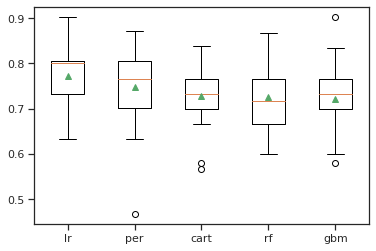

In [57]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X = Data_Imputed.iloc[:,:13]
    y = Data_Imputed.iloc[:,13]
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # lr #####################################################################
    # The decision tree will take the features selected by the RFE and fit a model.
    # The logistic regression model is only used by the RFE to evaluate different subsets of features selected by the RFE.
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron #############################################################
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart ###################################################################
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf #####################################################################
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm ####################################################################
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv     = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In the following example, RFECV is used instead of RFE. This way, each base model can choose different number of features to produce highest accuracy.

This example uses 10-fold CV for feature selection, then use 10-fold CV again for model selection.
Note that RFE and evaluation both use same models. This is to give each model the best chance to shine.

>lr 0.841 (0.061)
>per 0.697 (0.102)
>cart 0.735 (0.063)
>rf 0.815 (0.053)
>gbm 0.796 (0.058)


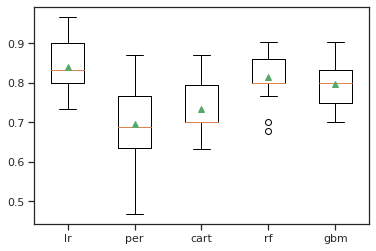

In [58]:
# explore the algorithm wrapped by RFECV.
# This will take some time.
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X = Data_Imputed.iloc[:,:13]
    y = Data_Imputed.iloc[:,13]
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    cv    = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
    # lr #####################################################################
    rfe   = RFECV(estimator=LogisticRegression(), cv=cv)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron #############################################################
    rfe   = RFECV(estimator=Perceptron(), cv=cv)
    model = Perceptron()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart ###################################################################
    rfe   = RFECV(estimator=DecisionTreeClassifier(), cv=cv)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf #####################################################################
    rfe   = RFECV(estimator=RandomForestClassifier(), cv=cv)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm ####################################################################
    rfe   = RFECV(estimator=GradientBoostingClassifier(), cv=cv)
    model = GradientBoostingClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv     = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()